# Innoplexus Online Hiring Hackathon: Artificial Intelligence (AI) Challenge
**Analytics Vidya**

### About Innoplexus

At **Innoplexus** we are helping organisations move to continuous decision-making by generating insights from structured and unstructured private and public data leveraging cutting edge Artificial Intelligence and Deep Learning technologies. We aim to transform batch decision making in enterprises into a continuum. We continuously develop our products to enable broader, deeper and faster insights and best-found decision-making.

 
We focus on industries that need to constantly evaluate and improve their efficiency, reduce cost and mitigate risk to keep up with the changing business environment. That’s why we leverage Artificial Intelligence and advanced analytics to shape the future of global finance, life sciences and pharmaceutical organisations. 

 

Our Data as a Service (DaaS) and Continuous Analytics as a Service (CaaS) solutions are helping Fortune 500 companies drive business outcomes. We automate the collection, curation, aggregation and analysis, of billions of data points from thousands of data sources, using machine learning, network analysis, ontologies, computer vision and entity normalization.

 

Founded in 2011, Innoplexus AG is headquartered in Frankfurt, Germany with offices in Pune, India, and New Jersey, USA.

 

Learn more at www.innoplexus.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,Webpage_id,Domain,Url,Tag
0,1,www.fiercepharma.com,http://www.fiercepharma.com/marketing/tecfider...,news
1,2,www.fiercepharma.com,http://www.fiercepharma.com/pharma/novo-equipp...,news
2,3,www.fiercepharma.com,http://www.fiercepharma.com/pharma/another-exe...,news
3,4,www.fiercepharma.com,http://www.fiercepharma.com/pharma/teva-buy-bi...,news
4,5,www.fiercepharma.com,http://www.fiercepharma.com/marketing/actress-...,news


Try shuffling the Dataset

In [3]:
# train=shuffle(train)

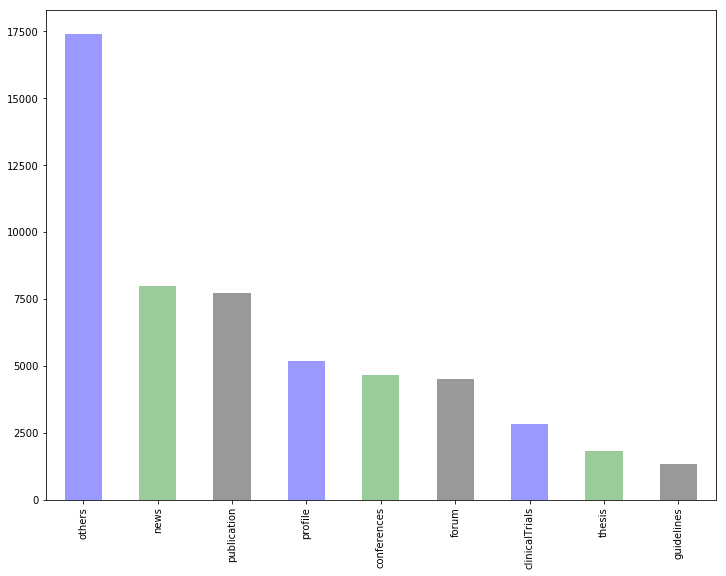

In [4]:
plt.figure(figsize=(12,9))
train.Tag.value_counts().plot(kind='bar',alpha=0.4,color = 'bgk')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53447 entries, 0 to 53446
Data columns (total 4 columns):
Webpage_id    53447 non-null int64
Domain        53447 non-null object
Url           53447 non-null object
Tag           53447 non-null object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


No Null Values Great!

In [6]:
traindf = train.groupby('Tag',as_index=False).count()
traindf

,Tag,Webpage_id,Domain,Url
0,clinicalTrials,2839,2839,2839
1,conferences,4666,4666,4666
2,forum,4503,4503,4503
3,guidelines,1329,1329,1329
4,news,7992,7992,7992
5,others,17417,17417,17417
6,profile,5196,5196,5196
7,publication,7705,7705,7705
8,thesis,1800,1800,1800


Checking out Some **URL** values

In [7]:
train.Url.sample(10).values

array(['http://www.canadianjournalofdiabetes.com/article/S1499-2671(14)00501-2/fulltext',
       'http://abstracts.ncri.org.uk/abstract/identification-of-novel-regulators-of-flip-ubiquitination-2/',
       'https://www.ncbi.nlm.nih.gov/pubmed/11898777',
       'http://agency.governmentjobs.com/sdcounty/default.cfm?action=viewjob&jobid=1561058',
       'http://www.leo-pharma.com/Home/LEO-Pharma/Media-centre/News/News-2017/Klox-Technologies-and-LEO-Pharma-set-up-company-for-BioPhotonic-in-dermatology.aspx',
       'http://www.menarini.com/Home/Menarini-News/News/News-details/ArticleId/1872/Menarini-International-Fair-Play-Awards-Menarini-celebrates-100-years-in-Florence-in-the-name-of-fair-play',
       'https://findadoc.unchealthcare.org/Default/Details/22670/?Index=4',
       'https://www.e-ceo.org/journal/view.php?id=10.3342/ceo.2015.8.4.396',
       'http://www.clinicaltrials.in.th/index.php?tp=regtrials&menu=trialsearch&smenu=fulltext&task=search&task2=view1&id=1066',
       'https:

OK, great, now lets look at the **Test Data**

In [8]:
test.head()

,Webpage_id,Domain,Url
0,31,isrctn.com,http://www.isrctn.com/ISRCTN57801413
1,32,www.clinicaltrialsregister.eu,https://www.clinicaltrialsregister.eu/ctr-sear...
2,33,www.clinicaltrialsregister.eu,https://www.clinicaltrialsregister.eu/ctr-sear...
3,34,www.clinicaltrialsregister.eu,https://www.clinicaltrialsregister.eu/ctr-sear...
4,35,www.clinicaltrialsregister.eu,https://www.clinicaltrialsregister.eu/ctr-sear...


In [9]:
train.Domain.value_counts()
print(train.Domain.nunique())

3974


So out of **53447** values in Dataset only **3974** are unique

Importing nltk, stopwords for getting what we need

In [10]:
import re
import nltk
from nltk.corpus import stopwords

Cleaning data which is URL's, as the **Html_Data.csv** is of **6.4GB**, out of my reach man!!!!
My Computer lagged totally, not able to open even in notepad++
So last option is the URL Cleaning which we will use to classify tags.

Not Good but it can be manageable

In [13]:
def url_to_words(raw_text):
    raw_text=raw_text.strip()
    no_coms=re.sub(r'\.com','',raw_text)
    no_urls=re.sub('https?://www','',no_coms)
    no_urls1=re.sub('https?://','',no_urls)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    letters_only = re.sub("[^a-zA-Z]", " ",no_encoding) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

applying to train Data

In [12]:
train['clean_url']=train['Url'].astype(str).apply(lambda x: url_to_words(x))
train['clean_url'].sample(10)

2795                                en search irct ir view
39691                             allergan company profile
21960                           myhealth umassmemorial org
30337    fertilityzone co uk index php page thread thre...
12521    infectagentscancer biomedcentral articles supp...
31695    forums pkdconnection org viewtopic php f sid e...
7599        aace meetings annual meeting abstracts archive
40989    drreddys investors investor services statutory...
38027              alexion contactus generalinquiries aspx
34089    blog dana farber org insight oncology hospitalist
Name: clean_url, dtype: object

Looks line cleaning got great

# Removed 
* https://www
* https://
* slashes and numbers

In [14]:
train1=train.drop(['Webpage_id','Domain','Url'],axis=1)
train1.head()

,Tag,clean_url
0,news,fiercepharma marketing tecfidera gilenya aubag...
1,news,fiercepharma pharma novo equipped weather stor...
2,news,fiercepharma pharma another exec departs troub...
3,news,fiercepharma pharma teva buy biosim specialist...
4,news,fiercepharma marketing actress marissa tomei p...


Removing what not needed, only classify using Text

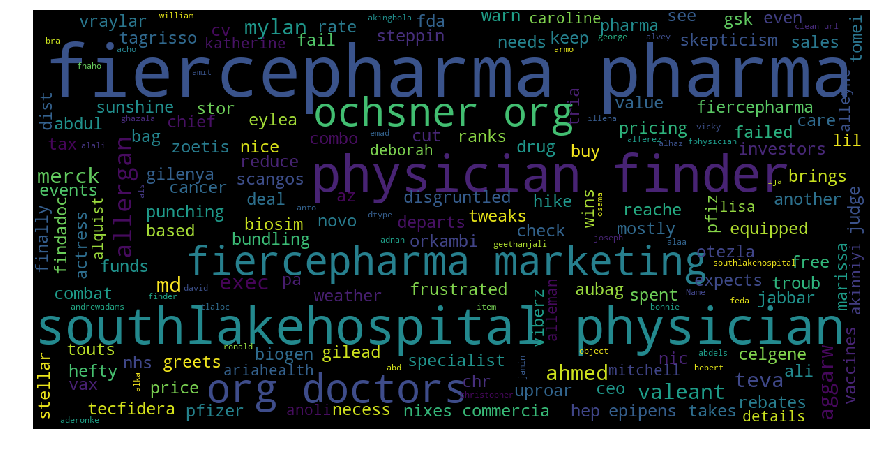

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords1 = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords1,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train1['clean_url'])

Looks like we have duplicate rows which can be avoided, but lets stick to original Dataset

applying function to test data as well for prediction

In [16]:
test['clean_url']=test['Url'].astype(str).apply(lambda x: url_to_words(x))

In [17]:
test1=test.drop(['Webpage_id','Domain','Url'],axis=1)
test1.head()

,clean_url
0,isrctn isrctn
1,clinicaltrialsregister eu ctr search trial gb
2,clinicaltrialsregister eu ctr search trial lt
3,clinicaltrialsregister eu ctr search trial
4,clinicaltrialsregister eu ctr search trial nl


## Main Model start

## Models tried

First of all, tried Bag of words approach using **CountVectorizer**  which convert a collection of text documents to a matrix of token counts

Implemented **Pipeline** feature to create a classification Model

Performed **GridSearchCV**, with various variations

* **MultinomialNB Classifier**
    * got 69% accuracy f1weighted score, thought ok, but it can do better
    * Trained and Tuned the model for alpha 0.1, 0.001, 10, but failed, it lloked ike no parametres are neded for Naive Bayes
    
* **RandomForestClassfier**
    * Totaly flopped, no way its was gonna be, gave only 58-65% accuracy, which was not even close to MultinomialNB even with tuning
    
* **Logistic Regression**
    * Hats off to its power, simple yet efficient, just simple implementing it gave about 72% accuracy, i though this needs to be tuned
    * Now came the most important part, the tuning of model, tried 
        * **dual** : bool, default: False :  Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.
            * No changes, needed something efficient
        * **C** : float, default: 1.0 : Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
            * Tried values ranging from 10 to 0.001, but still the score fluctuates only a little bit, thought let it be...currently not the best parameter to play with
        * **class_weight** : dict or ‘balanced’, default: None : Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
            * Turning point of the solution, in my mind i thought, the data is very baised to 'Others', lets balance it, reached 75% acc
        * **solver** : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’},
        default: ‘liblinear’ Algorithm to use in the optimization problem.
        For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ are faster for large ones.For multiclass problems, only ‘newton-cg’, ‘sag’ and ‘lbfgs’handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas‘liblinear’ and ‘saga’ handle L1 penalty.Note that ‘sag’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.
            * Tried variations of it, got the best out as **SAG** Stochastic Average Gradient descent solver.
            
        * **tol** : float, default: 1e-4 : Tolerance for stopping criteria.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
nb = MultinomialNB()
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('clf', LogisticRegression(verbose=1,class_weight='balanced',solver='sag',tol=0.01,C=0.5))
])
pipeline.get_params().keys()

dict_keys(['steps', 'bow', 'clf', 'bow__analyzer', 'bow__binary', 'bow__decode_error', 'bow__dtype', 'bow__encoding', 'bow__input', 'bow__lowercase', 'bow__max_df', 'bow__max_features', 'bow__min_df', 'bow__ngram_range', 'bow__preprocessor', 'bow__stop_words', 'bow__strip_accents', 'bow__token_pattern', 'bow__tokenizer', 'bow__vocabulary', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

In [29]:
pipeline.fit(train1['clean_url'],train1['Tag'])

convergence after 22 epochs took 0 seconds
convergence after 34 epochs took 1 seconds
convergence after 30 epochs took 0 seconds
convergence after 33 epochs took 1 seconds
convergence after 38 epochs took 0 seconds
convergence after 26 epochs took 1 seconds
convergence after 34 epochs took 0 seconds
convergence after 44 epochs took 1 seconds
convergence after 23 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.3s finished


Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...1, penalty='l2', random_state=None,
          solver='sag', tol=0.01, verbose=1, warm_start=False))])

In [30]:
predictions = pipeline.predict(test1.clean_url)
predictions

array(['clinicalTrials', 'clinicalTrials', 'clinicalTrials', ...,
       'others', 'others', 'others'], dtype=object)

In [31]:
predictions.shape

(25787,)

In [32]:
sub=pd.read_csv('sample_submission.csv')
sub.shape

(25787, 2)

In [33]:
sub.Tag=predictions

In [34]:
sub.head()

,Webpage_id,Tag
0,31,clinicalTrials
1,32,clinicalTrials
2,33,clinicalTrials
3,34,clinicalTrials
4,35,clinicalTrials


In [35]:
sub.to_csv('SubmissionMain.csv',index=False)